<a href="https://colab.research.google.com/github/YanaGlad/ExoplanetAnalyze/blob/master/exoplanet_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет планет за пределами Солнечной системы, появился в 1992 году, когда было обнаружено несколько планет земной массы, вращающихся вокруг пульсара PSR B1257+12. Поля данных включают атрибуты планеты и звезды-хозяина, методы обнаружения и (конечно же) дату обнаружения.

Файл содержит: 

PlanetIdentifier: Primary identifier of planet #id планеты

TypeFlag: [0=no known stellar binary companion; 1=P-type binary (circumbinary); 2=S-type binary; 3=orphan planet (no star)] # Флаг Типа: [0 = нет известного звездного двоичного спутника; 1 = двоичный тип P (круговой); 2= двоичный тип S; 3 = сиротская планета (без звезды)]

ListsPlanetIsOn: A list of lists the planet is on including "Confirmed planets", "Controversial", "Kepler Objects of Interest", etc. # Список списков, в которых находится планета, включает "Подтвержденные планеты", "Спорные", "Кеплеровы элементы" и т. Д.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.cm as cm
import sklearn.cluster as cluster
import matplotlib.colors as clr

Для начала загрузим датасет и посмотрим его на первые элементы



In [6]:
dataset = pd.read_csv('/content/data-exoplanet.csv')
dataset.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


Можно увидеть, что датасет содержит идентификатор планеты, и такие ее характеристики, как перид, кеплеровы элементы, ra и dec, расстояние от солнца и звезды, вокруг которой они вращаются, в каком году были открыты и прочее

 Подробнее взглянем на все колонки датасета


In [7]:
dataset.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

И посмотрим последнии 5 элементов датасета

In [8]:
dataset.tail()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
3579,eta Cet b,0,2.460,NaN,407.300000,1.270,0.17,247.20,NaN,NaN,81.9,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.99,1.70,14.30,0.12,4528.0,NaN,Confirmed planets
3580,eta Cet c,0,3.160,NaN,744.300000,1.930,0.02,36.67,NaN,NaN,81.9,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.99,1.70,14.30,0.12,4528.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.360,NaN,395.400000,1.051,0.07,NaN,NaN,NaN,NaN,256.8,NaN,RV,2003.0,10/12/29,12 30 26,+22 52 47,68.50,1.00,1.22,0.14,5407.0,NaN,Confirmed planets
3582,HD 108874 c,0,1.018,NaN,1605.800000,2.680,0.25,NaN,NaN,NaN,NaN,160.2,NaN,RV,2005.0,10/12/29,12 30 26,+22 52 47,68.50,1.00,1.22,0.14,5407.0,NaN,Confirmed planets
3583,Kepler-1473 b,0,NaN,0.106,14.427355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transit,2016.0,16/05/10,19 22 33,+48 59 46,NaN,1.09,1.09,-0.01,6046.0,NaN,Confirmed planets


Подробно взглянем на корреляцию признаков


In [9]:
dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
TypeFlag,1.00,0.07,0.16,0.11,0.02,0.09,-0.06,0.18,0.05,0.05,0.06,1.00,-0.15,-0.12,0.02,0.05,0.04,-0.02,0.04
PlanetaryMassJpt,0.07,1.00,0.29,0.03,0.02,0.17,0.03,0.10,0.37,0.10,0.11,-1.00,-0.03,-0.03,0.13,0.12,-0.01,0.02,0.28
RadiusJpt,0.16,0.29,1.00,0.04,0.08,-0.08,0.12,0.06,-0.32,0.03,0.40,nan,-0.14,-0.11,0.35,0.34,0.16,0.17,-0.16
PeriodDays,0.11,0.03,0.04,1.00,0.97,0.09,-0.05,0.25,0.06,0.13,-0.01,nan,-0.19,-0.05,0.09,0.01,-0.06,0.07,-0.09
SemiMajorAxisAU,0.02,0.02,0.08,0.97,1.00,0.15,-0.05,0.27,0.07,0.16,0.03,nan,-0.04,-0.00,0.03,0.00,-0.04,0.00,-0.06
Eccentricity,0.09,0.17,-0.08,0.09,0.15,1.00,0.01,0.10,0.27,0.08,-0.48,nan,-0.05,-0.20,0.02,0.07,0.05,-0.01,0.01
PeriastronDeg,-0.06,0.03,0.12,-0.05,-0.05,0.01,1.00,0.06,0.33,-0.04,-0.04,nan,0.02,-0.04,-0.05,0.04,-0.05,0.05,-0.15
LongitudeDeg,0.18,0.10,0.06,0.25,0.27,0.10,0.06,1.00,0.38,-0.10,-0.59,nan,-0.30,0.02,0.35,0.36,-0.03,0.33,-0.40
AscendingNodeDeg,0.05,0.37,-0.32,0.06,0.07,0.27,0.33,0.38,1.00,0.10,-0.05,nan,-0.02,-0.29,-0.04,0.10,-0.01,0.00,-0.05
InclinationDeg,0.05,0.10,0.03,0.13,0.16,0.08,-0.04,-0.10,0.10,1.00,0.21,nan,0.34,0.08,0.01,0.11,-0.00,0.02,0.08


Взглянем подробнее на массы планет


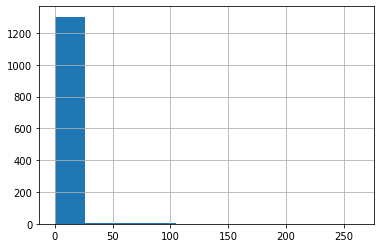

In [10]:
dataset.PlanetaryMassJpt.hist()


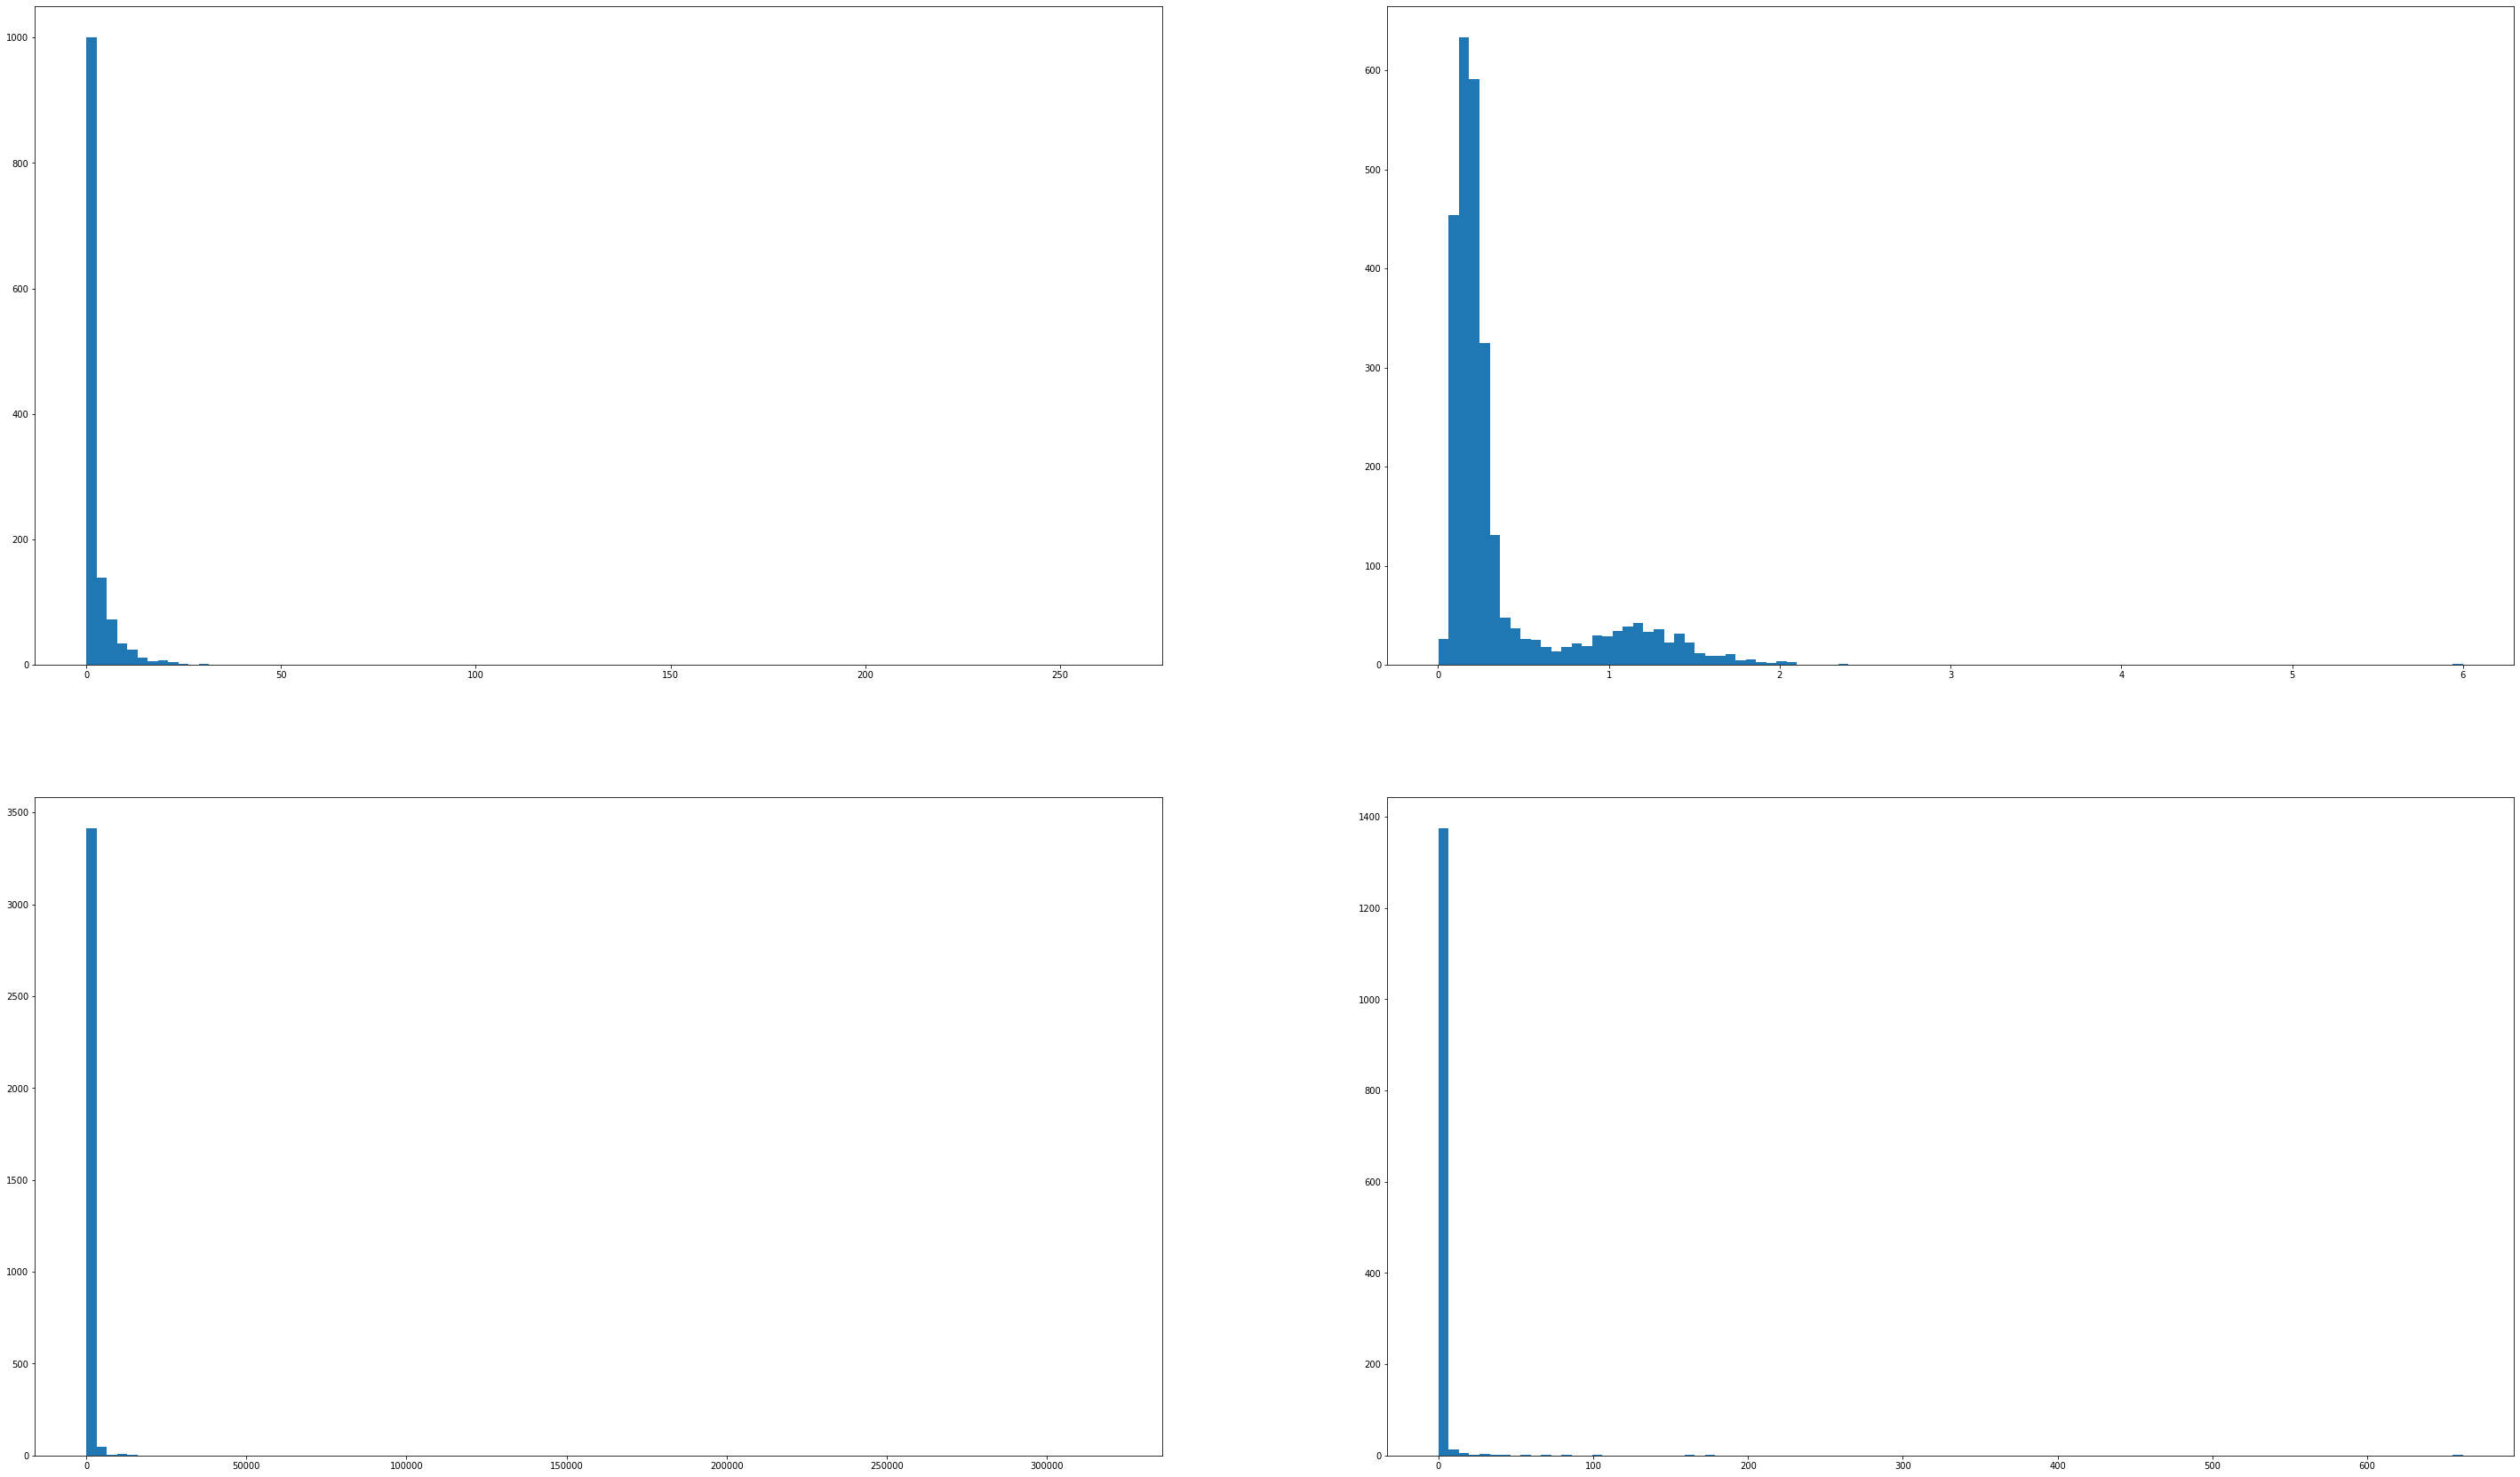

In [11]:
fig, axes = plt.subplots(2, 2,figsize=(50,30))
axes[0,0].hist(dataset["PlanetaryMassJpt"],bins=100)
axes[0,1].hist(dataset["RadiusJpt"],bins=100)
axes[1,0].hist(dataset["PeriodDays"],bins=100)
axes[1,1].hist(dataset["SemiMajorAxisAU"],bins=100)
plt.show()

Планеты солнечной системы

In [13]:
solar_system = dataset[dataset["ListsPlanetIsOn"]=="Solar System"]
solar_system

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
408,Mercury,0,0.000174,0.034902,87.9700,0.387098,0.205637,77.457719,252.251667,48.339618,7.005594,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
409,Venus,0,0.002564,0.086565,224.7000,0.723321,0.006764,131.767557,181.979708,76.672615,3.397775,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
410,Earth,0,0.003146,0.091130,365.2422,1.000000,0.016732,102.930059,100.466916,-5.112604,-0.000543,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
411,Mars,0,0.000338,0.048489,686.9800,1.523712,0.093365,-23.917448,-4.568132,49.713210,1.851819,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
412,Jupiter,0,1.000000,1.000000,4332.8200,5.202480,0.048536,14.274952,34.334792,100.292827,1.298614,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
413,Saturn,0,0.299000,0.832944,10755.6700,9.541499,0.055508,92.861361,50.075713,113.639987,2.494241,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
414,Uranus,0,0.045700,0.362775,30687.1530,19.187979,0.046857,172.434044,314.202766,73.962502,0.772981,NaN,NaN,NaN,1781.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
415,Neptune,0,0.053953,0.352219,60190.0300,30.069528,0.008954,46.681587,304.222893,131.786359,1.770055,NaN,NaN,NaN,1846.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System
416,Pluto,0,0.000008,0.016438,90553.0200,39.486860,0.248852,224.097026,238.965350,110.301680,17.141043,NaN,NaN,NaN,1930.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System


Построим гистограммы для планет солнечной системы

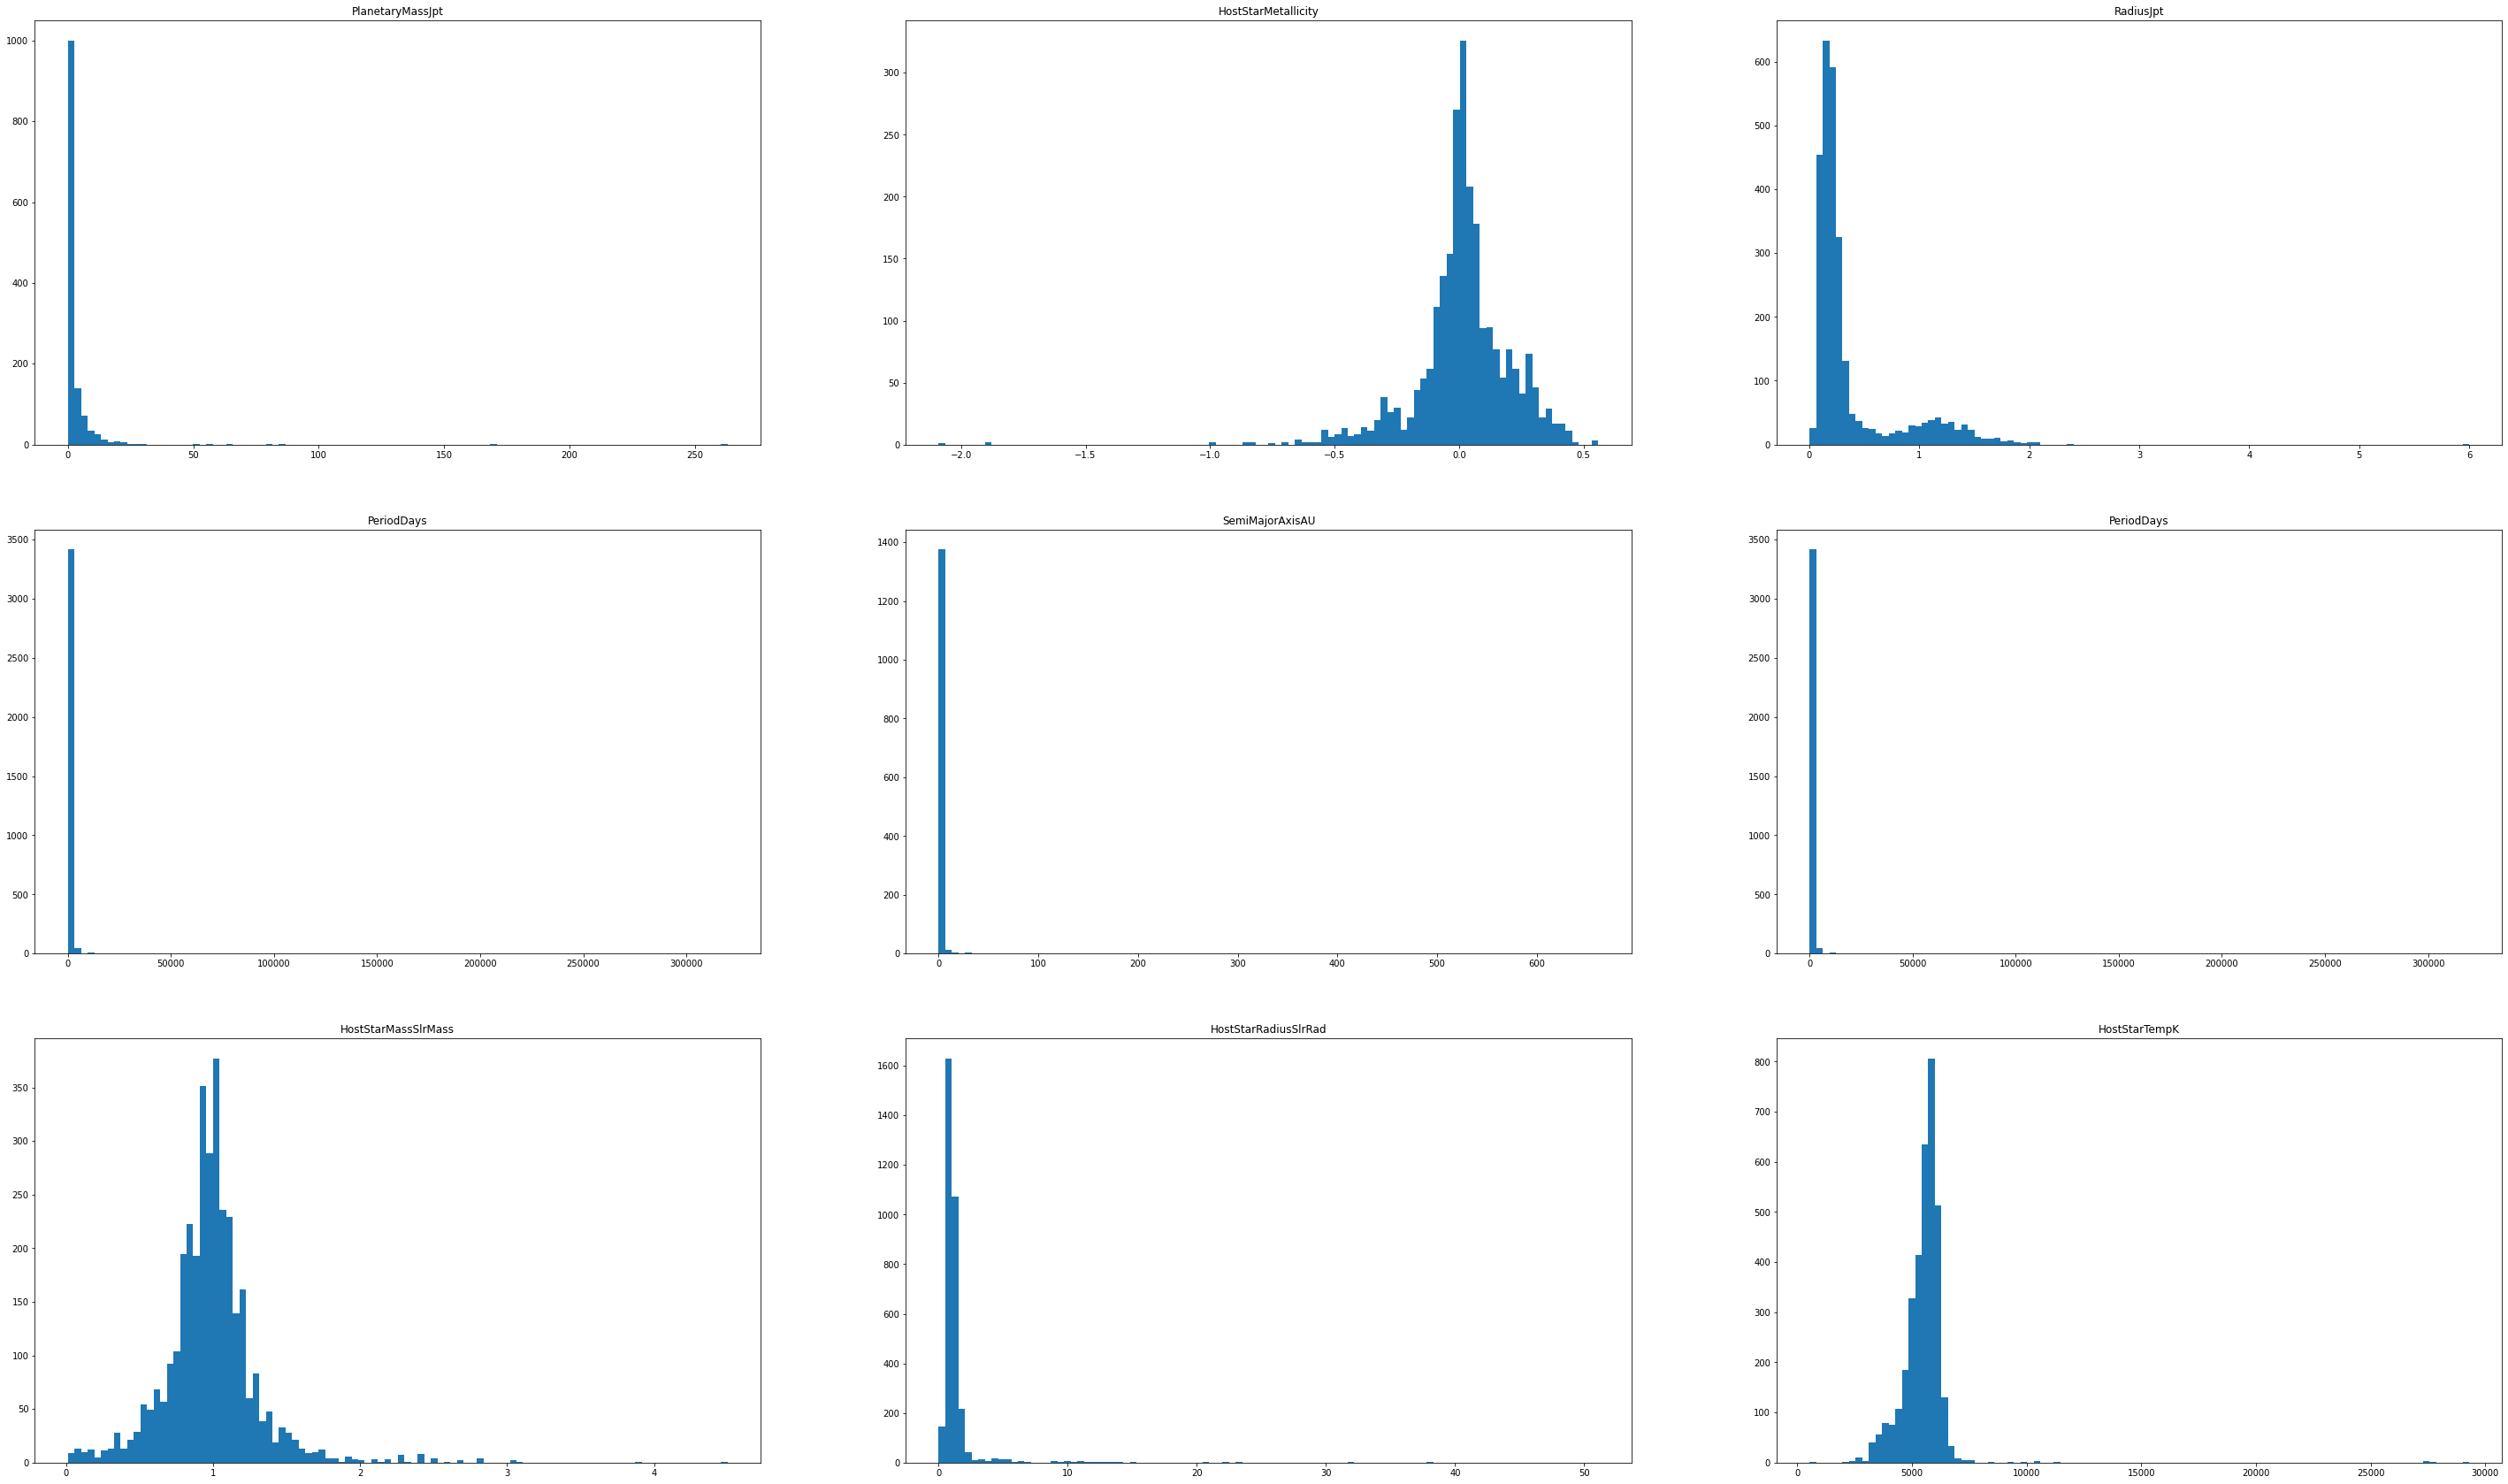

In [14]:
fig, axes = plt.subplots(3, 3,figsize=(50,30))
axes[0,0].hist(dataset["PlanetaryMassJpt"],bins=100)
axes[0,0].set_title("PlanetaryMassJpt")

axes[0,1].hist(dataset["HostStarMetallicity"],bins=100)
axes[0,1].set_title("HostStarMetallicity")

axes[0,2].hist(dataset["RadiusJpt"],bins=100)
axes[0,2].set_title("RadiusJpt")

axes[1,0].hist(dataset["PeriodDays"],bins=100)
axes[1,0].set_title("PeriodDays")

axes[1,1].hist(dataset["SemiMajorAxisAU"],bins=100)
axes[1,1].set_title("SemiMajorAxisAU")

axes[1,2].hist(dataset["PeriodDays"],bins=100)
axes[1,2].set_title("PeriodDays")

axes[2,0].hist(dataset["HostStarMassSlrMass"],bins=100)
axes[2,0].set_title("HostStarMassSlrMass")

axes[2,1].hist(dataset["HostStarRadiusSlrRad"],bins=100)
axes[2,1].set_title("HostStarRadiusSlrRad")

axes[2,2].hist(dataset["HostStarTempK"],bins=100)
axes[2,2].set_title("HostStarTempK")

plt.show()

Избавимся от пустых значений

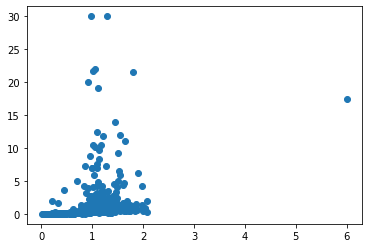

In [15]:
dataset=dataset.dropna(subset=['PlanetaryMassJpt', 'RadiusJpt']) 
plt.scatter(dataset["RadiusJpt"],dataset["PlanetaryMassJpt"])

Логарифмическая трансформация
Берем логарифмические значения переменных и проводим через них прямую линию

Наклон линии - степень многочлена

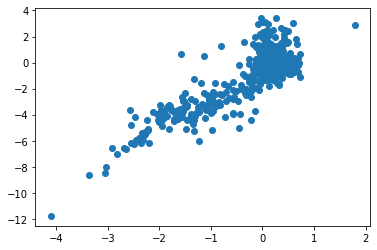

In [16]:
dataset["PlanetaryMassJptlog"]=dataset["PlanetaryMassJpt"].apply(np.log)
dataset["RadiusJptlog"]=dataset["RadiusJpt"].apply(np.log)

plt.scatter(dataset["RadiusJptlog"],dataset["PlanetaryMassJptlog"])

Применим популярный метод кластеризации "k средних", "k-means"

Разделим планеты на два кластера по массе и радиусу. В итоге они окажутся либо планетами земного типа, либо газовыми гигантами

К газовым гигантам относятся Юпитер, Сатурн, Уран и Нептун

К планетам земного типа - Меркурий, Венера, Земля и Марс


In [17]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [18]:
x_train=np.array(dataset[["RadiusJptlog","PlanetaryMassJptlog"]])
x_train

array([[-2.91877123, -6.57128304],
       [-0.17435339, -1.38629436],
       [-0.19845094, -1.77195684],
       ...,
       [ 0.02371653,  1.40192162],
       [ 0.73476886, -1.07880966],
       [ 0.17981843,  1.20237152]])

In [19]:
km.fit(x_train)
y_mean = km.fit_predict(x_train)

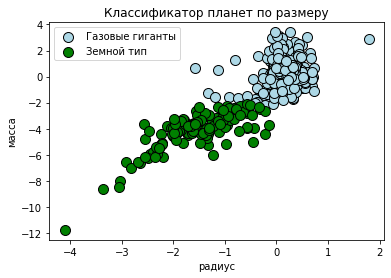

In [22]:
plt.scatter(
    x_train[y_mean == 0, 0], x_train[y_mean == 0, 1],
    s=100, c='lightblue',
    edgecolor='black',
    label='Газовые гиганты'
)

plt.scatter(
    x_train[y_mean == 1, 0], x_train[y_mean == 1, 1],
    s=100, c='green',
    edgecolor='black',
    label='Земной тип'
)
plt.title('Классификатор планет по размеру')
plt.xlabel('радиус')
plt.ylabel('масса')

plt.legend(scatterpoints=1)
plt.show()

Диаграмма температур планет

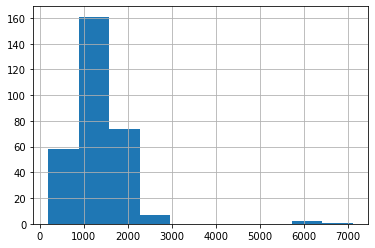

In [23]:
dataset.SurfaceTempK.hist()
 

Средняя температура всех экзопланет



In [24]:
 dataset.SurfaceTempK.mean()


1354.318481848184

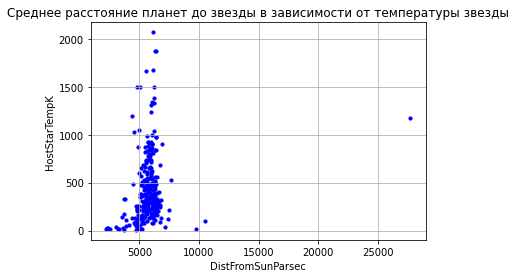

In [25]:
dist = dataset['DistFromSunParsec'].groupby([dataset['HostStarTempK']]).mean()
distY = dist
distX = dist.index

plt.grid()
plt.xlabel("DistFromSunParsec")
plt.ylabel("HostStarTempK")
plt.title("Среднее расстояние планет до звезды в зависимости от температуры звезды")

plt.scatter(distX, distY, 10, color="blue")
plt.plot(np.unique(distX), np.poly1d(np.polyfit(distX, distY, 1))(np.unique(distX)))

Найдем потенциально пригодные для жизни планеты

[Воспользуемся информацией, которую предоставляет сайт НАСА](https://exoplanets.nasa.gov/search-for-life/habitable-zone/)

Посмотрим на массу, радиус, металличность и температуру звезды

In [124]:
features = ['HostStarMassSlrMass','HostStarMetallicity','HostStarTempK', 'HostStarRadiusSlrRad']
stars_scatter = dataset[features].dropna()

x = stars_scatter['HostStarMassSlrMass']
y = stars_scatter['HostStarMetallicity']

area = np.pi * stars_scatter['HostStarRadiusSlrRad']**3

colors = stars_scatter['HostStarTempK']

In [125]:
area

2        0.286278
5        3.333883
6        3.333883
7        3.333883
15      32.547629
          ...    
3557     1.434241
3572    12.088067
3574     4.238739
3576    11.608560
3577    11.362529
Name: HostStarRadiusSlrRad, Length: 428, dtype: float64

Coolbar , показывающий температуру фотосферы

In [126]:
normalize = clr.Normalize(vmin=colors.min(), vmax=colors.max())
colormap = cm.Dark2

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(colors)


Text(-40, 40, 'Солнце')

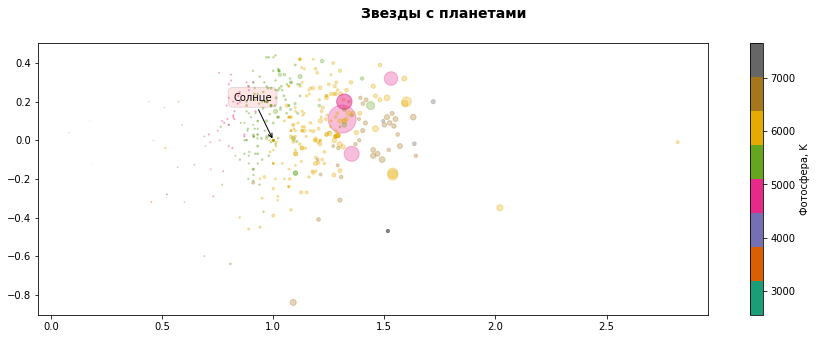

In [127]:
fig = plt.figure()
fig.suptitle('Звезды с планетами', fontsize=14, fontweight='bold')
ax.set_xlabel('Солнечная масса')
ax.set_ylabel('Металличность')
fig.set_size_inches(15, 5)

clb = plt.colorbar(scalarmappaple)
clb.set_label('Фотосфера, K')


plt.scatter(x, y, s=area, c = normalize(colors), cmap = colormap, alpha=0.3)
plt.annotate('Солнце', xy = (1,0), 
             xytext = (-40, 40),
             textcoords = 'offset points',  
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.1),
             arrowprops = dict(arrowstyle = '->')
             )

Найдем звезды, похожие на солнце

In [128]:
sun_like_stars = dataset[(dataset.HostStarMassSlrMass > 0.5)&(dataset.HostStarMassSlrMass < 1.5)
&(dataset.HostStarRadiusSlrRad > 0.5)&(dataset.HostStarRadiusSlrRad < 1.5)]

star_features = ['HostStarMassSlrMass','HostStarRadiusSlrRad','HostStarMetallicity','HostStarTempK','HostStarAgeGyr']
sun_like_stars[star_features].describe()

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,347.000000,347.000000,304.000000,346.000000,164.000000
mean,1.005476,1.045179,0.076954,5630.176301,4.955027
std,0.158470,0.214590,0.189905,511.990292,3.362337
min,0.514000,0.550000,-0.640000,3540.000000,0.009500
25%,0.910000,0.890000,-0.012500,5383.000000,2.257500
50%,1.000000,1.022000,0.085000,5672.500000,4.570000
75%,1.108000,1.183000,0.210000,5971.500000,7.000000
max,1.495000,1.497000,0.440000,7400.000000,13.900000


In [129]:
print("Количество солнцеподобных звезд: " + str(sun_like_stars.shape[0]))


Количество солнцеподобных звезд: 347


Text(-50, 50, 'Солнце')

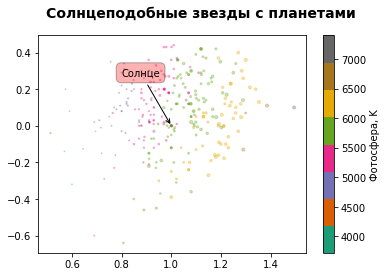

In [131]:
stars_scatter_slr = sun_like_stars[features].dropna()
x = stars_scatter_slr['HostStarMassSlrMass']
y = stars_scatter_slr['HostStarMetallicity']
area = np.pi * stars_scatter_slr['HostStarRadiusSlrRad']**3
colors = stars_scatter_slr['HostStarTempK']

fig = plt.figure()
fig.suptitle('Солнцеподобные звезды с планетами', fontsize=14, fontweight='bold')
ax.set_xlabel('Солнечная масса')
ax.set_ylabel('Металличность')

normalize = clr.Normalize(vmin=colors.min(), vmax=colors.max())
colormap = cm.Dark2

scalar_mappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalar_mappaple.set_array(colors)

clb = plt.colorbar(scalar_mappaple)
clb.set_label('Фотосфера, K')

plt.scatter(x, y, s=area, c = normalize(colors), cmap = colormap, alpha=0.3)
plt.annotate('Солнце', xy = (1,0), 
             xytext = (-50, 50),
             textcoords = 'offset points',  
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.3),
             arrowprops = dict(arrowstyle = '->')
             )